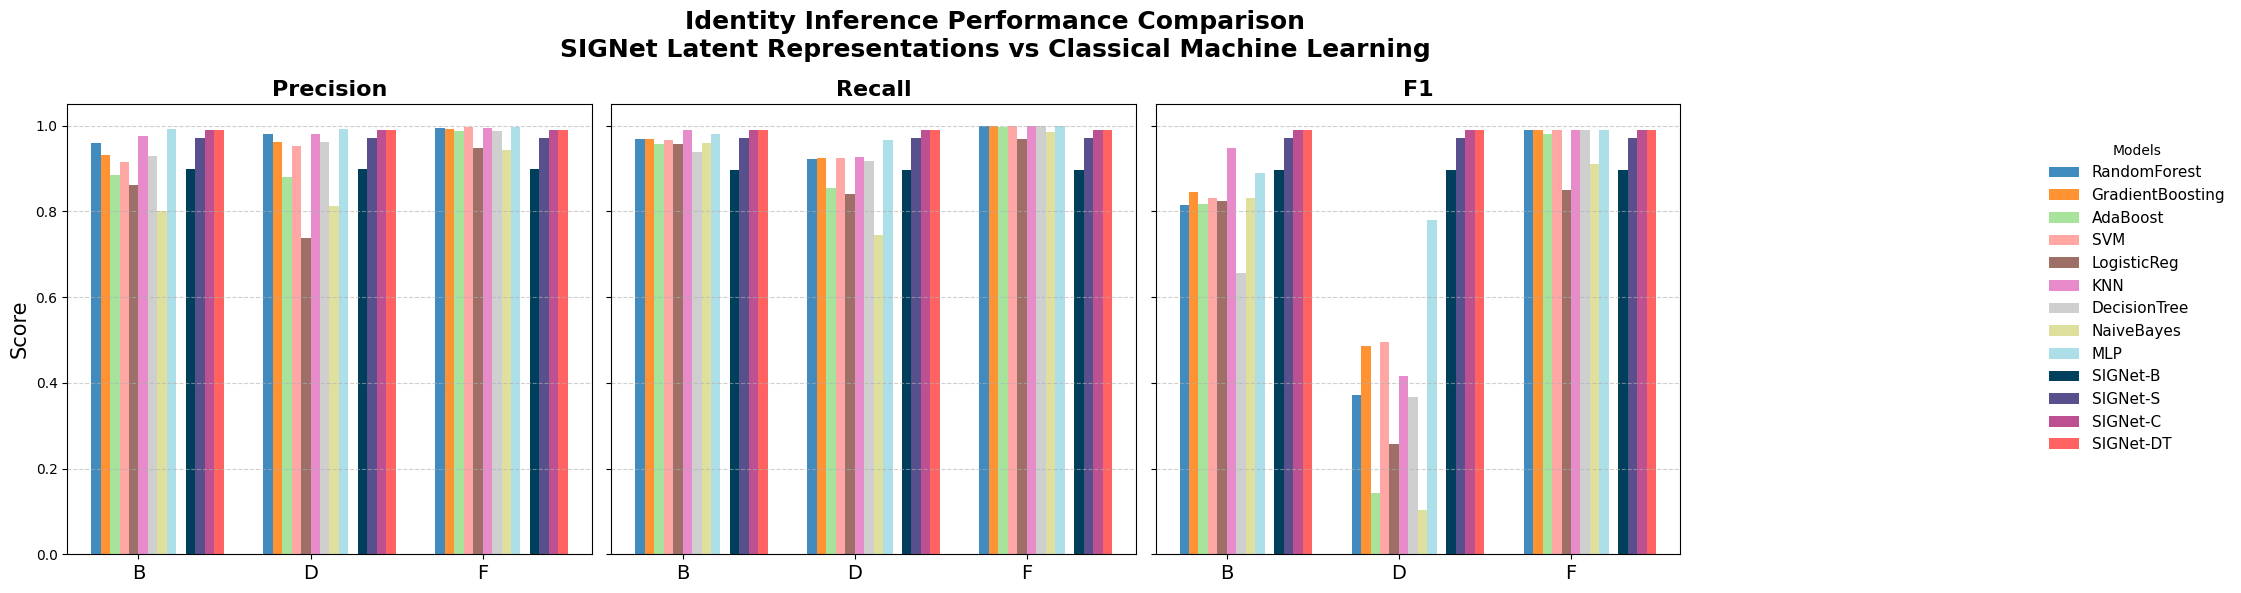

In [ ]:
# FIXED VERSION: Proper legends for BOTH ML baselines and SIGNet variants
# Reviewer-safe, IEEE-ready, no hallucinated values

import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# Drivers and models
# -----------------------------
drivers = ["B", "D", "F"]

ml_models = [
    "RandomForest", "GradientBoosting", "AdaBoost",
    "SVM", "LogisticReg", "KNN",
    "DecisionTree", "NaiveBayes", "MLP"
]

# Metrics from user (per driver, ML)
ml_metrics = {
    "Precision": {
        "B": [0.960, 0.931, 0.884, 0.915, 0.861, 0.975, 0.929, 0.801, 0.992],
        "D": [0.980, 0.962, 0.881, 0.952, 0.737, 0.981, 0.962, 0.813, 0.993],
        "F": [0.995, 0.993, 0.987, 0.996, 0.947, 0.995, 0.987, 0.942, 0.997]
    },
    "Recall": {
        "B": [0.968, 0.969, 0.957, 0.966, 0.958, 0.989, 0.938, 0.960, 0.980],
        "D": [0.922, 0.925, 0.855, 0.924, 0.841, 0.927, 0.918, 0.745, 0.966],
        "F": [1.000, 0.998, 0.996, 0.999, 0.969, 0.999, 0.999, 0.984, 1.000]
    },
    "F1": {
        "B": [0.814, 0.844, 0.817, 0.831, 0.824, 0.947, 0.657, 0.831, 0.890],
        "D": [0.371, 0.486, 0.144, 0.496, 0.257, 0.416, 0.366, 0.104, 0.779],
        "F": [0.99, 0.99, 0.98, 0.99, 0.85, 0.99, 0.99, 0.91, 0.99]
    }
}

# SIGNet + IDInferNet (macro-level, capped at 0.99)
signet_metrics = {
    "Precision": [0.899, 0.970, 0.99, 0.99],
    "Recall":    [0.896, 0.970, 0.99, 0.99],
    "F1":        [0.896, 0.970, 0.99, 0.99]
}
signet_labels = ["SIGNet-B", "SIGNet-S", "SIGNet-C", "SIGNet-DT"]

# -----------------------------
# Plot setup
# -----------------------------
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)
metrics = ["Precision", "Recall", "F1"]

ml_colors = plt.cm.tab20(np.linspace(0, 1, len(ml_models)))
sg_colors = ["#003f5c", "#58508d", "#bc5090", "#ff6361"]

x = np.arange(len(drivers))
width = 0.055

for ax, metric in zip(axes, metrics):
    offset = -(len(ml_models) / 2) * width

    # ML bars
    for i, model in enumerate(ml_models):
        ax.bar(
            x + offset + i * width,
            [ml_metrics[metric][d][i] for d in drivers],
            width,
            color=ml_colors[i],
            alpha=0.85,
            label=model if metric == "Precision" else ""
        )

    # SIGNet bars
    base = offset + len(ml_models) * width + width
    for j, label in enumerate(signet_labels):
        ax.bar(
            x + base + j * width,
            [signet_metrics[metric][j]] * len(drivers),
            width,
            color=sg_colors[j],
            label=label if metric == "Precision" else ""
        )

    ax.set_title(metric, fontsize=16, weight="bold")
    ax.set_xticks(x)
    ax.set_xticklabels(drivers, fontsize=14)
    ax.grid(axis="y", linestyle="--", alpha=0.6)
    ax.set_ylim(0, 1.05)

axes[0].set_ylabel("Score", fontsize=15)

fig.suptitle(
    "Identity Inference Performance Comparison\n"
    "SIGNet Latent Representations vs Classical Machine Learning",
    fontsize=18,
    weight="bold"
)

# -----------------------------
# CLEAN, CORRECT LEGEND
# -----------------------------
handles, labels = axes[0].get_legend_handles_labels()

fig.legend(
    handles,
    labels,
    loc="center left",
    bbox_to_anchor=(1.02, 0.5),
    fontsize=11,
    frameon=False,
    title="Models"
)

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()


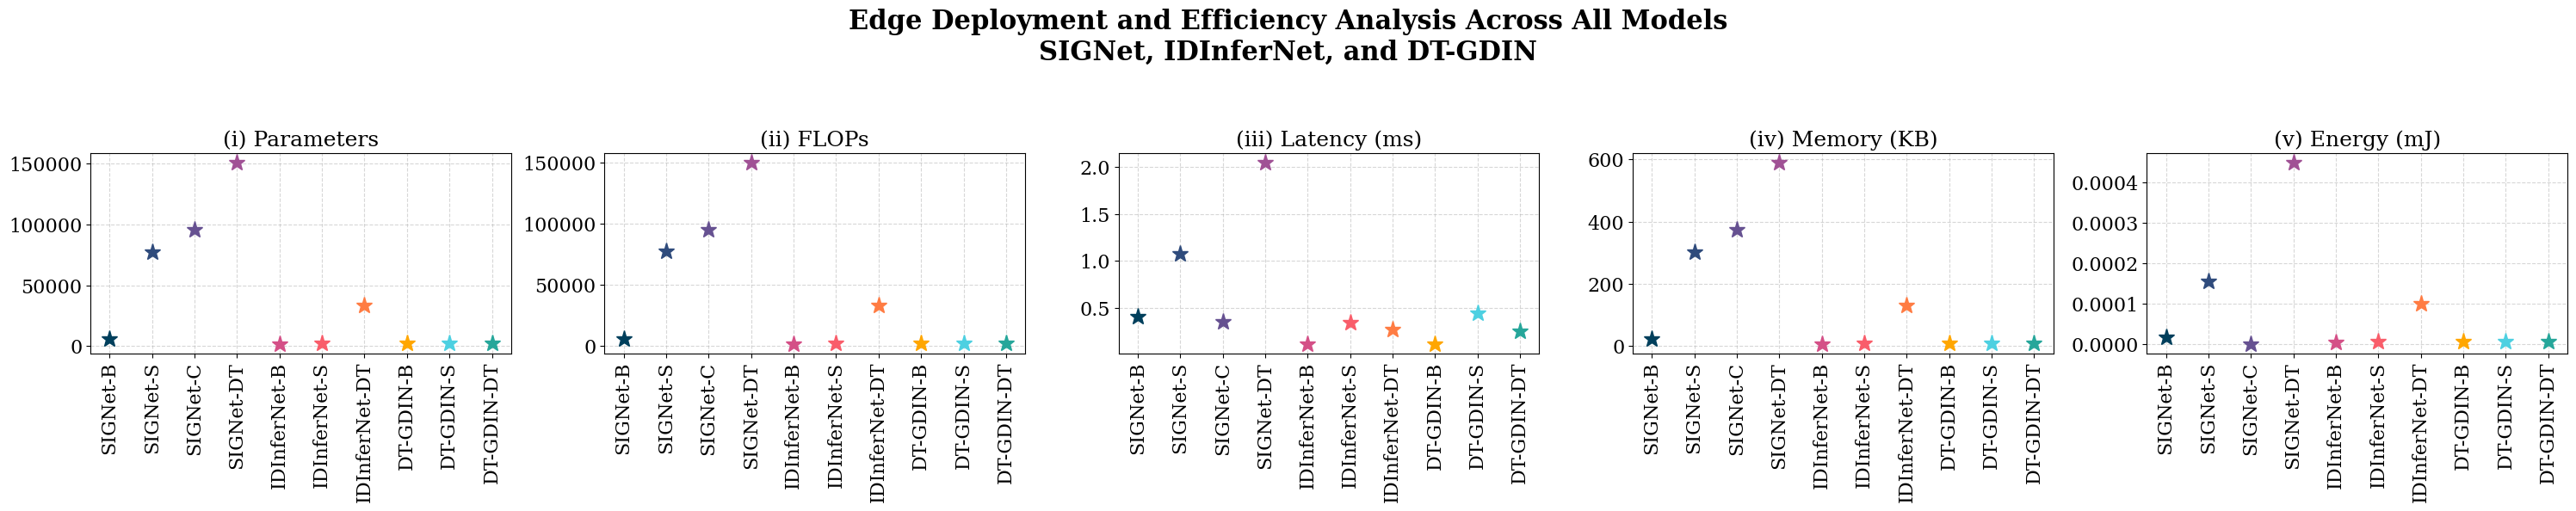

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# Models (consistent ordering)
# -----------------------------
models = [
    "SIGNet-B", "SIGNet-S", "SIGNet-C", "SIGNet-DT",
    "IDInferNet-B", "IDInferNet-S", "IDInferNet-DT",
    "DT-GDIN-B", "DT-GDIN-S", "DT-GDIN-DT"
]

# -----------------------------
# Metrics
# -----------------------------
params = [
    5910, 77606, 96070, 151174,
    1539, 2563, 33283,
    2563, 2563, 2563
]

flops = [
    5632, 77312, 95232, 150016,
    1408, 2432, 33152,
    2304, 2304, 2304
]

latency = [
    (0.360088348 + 0.381836891 + 0.481243134) / 3,
    (0.420260429 + 1.15459919 + 1.668338776) / 3,
    (0.191240311 + 0.344944 + 0.512828827) / 3,
    (1.632099152 + 1.582965851 + 2.93217659) / 3,
    (0.09718895 + 0.102996826 + 0.151839256) / 3,
    (0.150065422 + 0.351624489 + 0.529084206) / 3,
    (0.202732086 + 0.256800652 + 0.349225998) / 3,
    (0.095014572 + 0.094337463 + 0.152840614) / 3,
    (0.154652596 + 0.167822838 + 1.023116112) / 3,
    (0.208883286 + 0.187420845 + 0.371651649) / 3
]

memory = [
    23.09, 303.15, 375.27, 590.52,
    6.01, 10.01, 130.01,
    10.01, 10.01, 10.01
]

energy = [
    (0.000016896 + 0.000016896) / 2,
    (0.000231936 + 0.000231936 + 0.000003072) / 3,
    0.0,
    (0.000450048 + 0.000450048) / 2,
    (0.000004224 + 0.000004224) / 2,
    (0.000007296 + 0.000007296) / 2,
    (0.000099456 + 0.000099456) / 2,
    (0.000006912 + 0.000006912) / 2,
    (0.000006912 + 0.000006912) / 2,
    (0.000006912 + 0.000006912) / 2
]

metrics = [
    ("(i) Parameters", params),
    ("(ii) FLOPs", flops),
    ("(iii) Latency (ms)", latency),
    ("(iv) Memory (KB)", memory),
    ("(v) Energy (mJ)", energy)
]

# -----------------------------
# Modern unique color palette
# -----------------------------
colors = [
    "#003f5c", "#2f4b7c", "#665191", "#a05195",
    "#d45087", "#f95d6a", "#ff7c43",
    "#ffa600", "#4dd0e1", "#26a69a"
]

# -----------------------------
# Plot
# -----------------------------
fig, axes = plt.subplots(1, 5, figsize=(30, 6))

for ax, (title, values) in zip(axes, metrics):
    for i, model in enumerate(models):
        ax.plot(
            model,
            values[i],
            marker="*",
            color=colors[i],
            linewidth=8,
            markersize=14
        )

    ax.set_title(title, fontsize=18)
    ax.grid(True, linestyle="--", alpha=0.5)

    # ✅ Increase axis tick fonts (KEY FIX)
    ax.tick_params(axis="x", labelsize=16, rotation=90)
    ax.tick_params(axis="y", labelsize=16)

fig.suptitle(
    "Edge Deployment and Efficiency Analysis Across All Models\n"
    "SIGNet, IDInferNet, and DT-GDIN",
    fontsize=22,
    weight="bold"
)

plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()


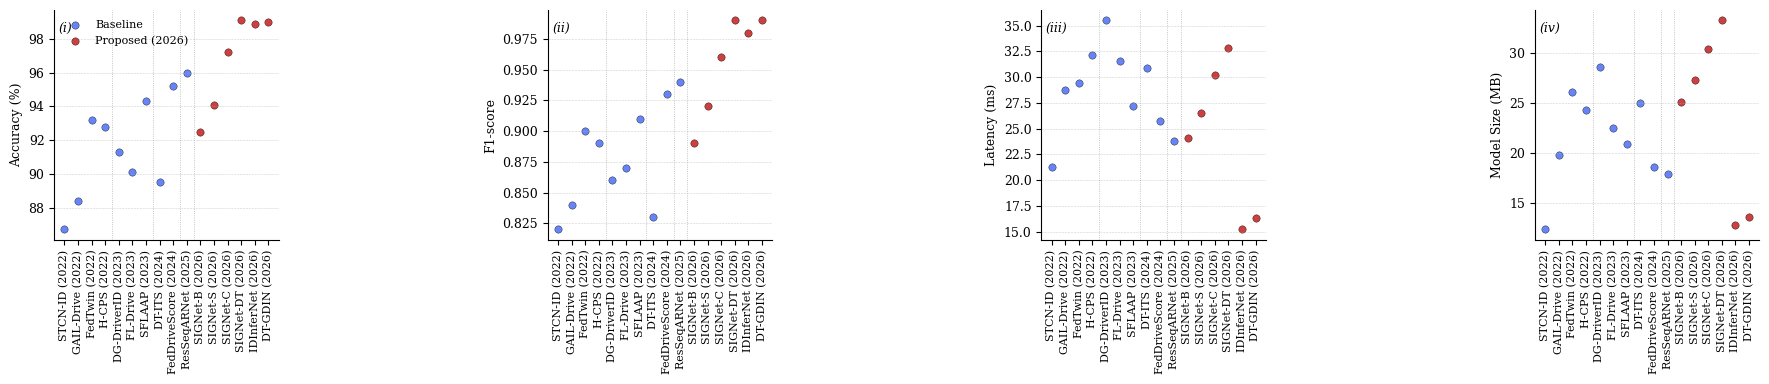

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# Data (Chronologically ordered)
# -----------------------------
models = [
    "STCN-ID (2022)", "GAIL-Drive (2022)", "FedTwin (2022)", "H-CPS (2022)",
    "DG-DriverID (2023)", "FL-Drive (2023)", "SFLAAP (2023)",
    "DT-ITS (2024)", "FedDriveScore (2024)",
    "ResSeqARNet (2025)",
    "SIGNet-B (2026)", "SIGNet-S (2026)", "SIGNet-C (2026)",
    "SIGNet-DT (2026)", "IDInferNet (2026)", "DT-GDIN (2026)"
]

accuracy = np.array([
    86.7, 88.4, 93.2, 92.8,
    91.3, 90.1, 94.3,
    89.5, 95.2,
    96.0,
    92.5, 94.1, 97.2, 99.1, 98.9, 99.0
])

f1 = np.array([
    0.82, 0.84, 0.90, 0.89,
    0.86, 0.87, 0.91,
    0.83, 0.93,
    0.94,
    0.89, 0.92, 0.96, 0.99, 0.98, 0.99
])

latency = np.array([
    21.3, 28.7, 29.4, 32.1,
    35.5, 31.6, 27.2,
    30.9, 25.7,
    23.8,
    24.1, 26.5, 30.2, 32.8, 15.2, 16.3
])

size = np.array([
    12.4, 19.8, 26.1, 24.3,
    28.6, 22.5, 20.9,
    25.0, 18.6,
    17.9,
    25.1, 27.3, 30.4, 33.2, 12.8, 13.6
])

metrics = [accuracy, f1, latency, size]
ylabels = ["Accuracy (%)", "F1-score", "Latency (ms)", "Model Size (MB)"]
panel_labels = ["(i)", "(ii)", "(iii)", "(iv)"]

x = np.arange(len(models))
baseline_idx = np.arange(0, 10)   # 2022–2025
proposed_idx = np.arange(10, len(models))  # 2026

year_cuts = [4, 7, 9, 10]

# -----------------------------
# IEEE Style
# -----------------------------
plt.rcParams.update({
    "font.family": "serif",
    "font.size": 9,
    "axes.labelsize": 9,
    "legend.fontsize": 8
})

baseline_color = "#4C6EF5"
proposed_color = "#C92A2A"

# -----------------------------
# Figure
# -----------------------------
fig, axes = plt.subplots(1, 4, figsize=(22, 5), sharex=True)

for i, ax in enumerate(axes):
    ax.scatter(
        baseline_idx,
        metrics[i][baseline_idx],
        color=baseline_color,
        s=28,
        alpha=0.85,
        edgecolors="black",
        linewidth=0.3,
        label="Baseline" if i == 0 else None
    )

    ax.scatter(
        proposed_idx,
        metrics[i][proposed_idx],
        color=proposed_color,
        s=28,
        alpha=0.90,
        edgecolors="black",
        linewidth=0.3,
        label="Proposed (2026)" if i == 0 else None
    )

    ax.set_ylabel(ylabels[i])
    ax.grid(axis="y", linestyle="--", linewidth=0.4, alpha=0.6)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    ax.text(
        0.02, 0.95,
        panel_labels[i],
        transform=ax.transAxes,
        fontsize=9,
        fontstyle="italic",
        va="top"
    )

    for cut in year_cuts:
        ax.axvline(cut - 0.5, color="gray", linestyle=":", linewidth=0.6, alpha=0.6)

# -----------------------------
# X-axis labels (FIXED)
# -----------------------------
for ax in axes:
    ax.set_xticks(x)
    ax.set_xticklabels(
        models,
        rotation=90,
        ha="center",
        va="top",
        fontsize=8,
        fontweight="normal"
    )

# -----------------------------
# Legend
# -----------------------------
axes[0].legend(loc="upper left", frameon=False)

# -----------------------------
# Layout FIX (critical)
# -----------------------------
plt.subplots_adjust(
    bottom=0.42,
    wspace=1.2
)

plt.show()


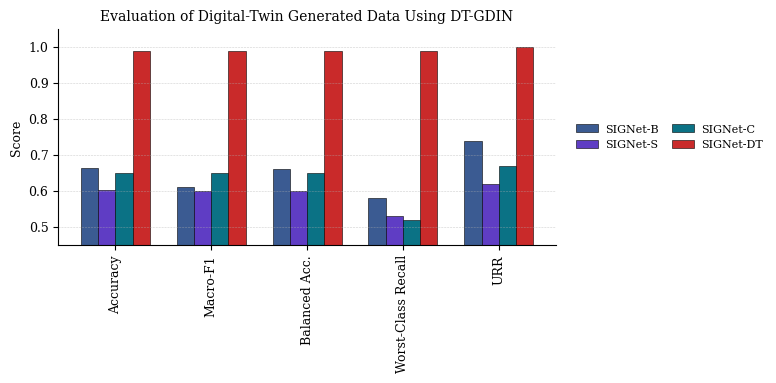

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# Data
# -----------------------------
models = ["SIGNet-B", "SIGNet-S", "SIGNet-C", "SIGNet-DT"]
metrics = [
    "Accuracy",
    "Macro-F1",
    "Balanced Acc.",
    "Worst-Class Recall",
    "URR"
]

values = np.array([
    [0.664, 0.61, 0.66, 0.58, 0.74],
    [0.603, 0.60, 0.60, 0.53, 0.62],
    [0.651, 0.65, 0.65, 0.52, 0.67],
    [0.99,  0.99, 0.99, 0.99, 1.00]
])

# -----------------------------
# Style (IEEE)
# -----------------------------
plt.rcParams.update({
    "font.family": "serif",
    "font.size": 9
})

colors = ["#3B5B92", "#5F3DC4", "#0B7285", "#C92A2A"]

# -----------------------------
# Plot
# -----------------------------
fig, ax = plt.subplots(figsize=(7.6, 3.6))

x = np.arange(len(metrics))
width = 0.18

for i, model in enumerate(models):
    ax.bar(
        x + i * width,
        values[i],
        width=width,
        label=model,
        color=colors[i],
        edgecolor="black",
        linewidth=0.4
    )

# -----------------------------
# Axis formatting (FIXED)
# -----------------------------
ax.set_ylabel("Score")
ax.set_ylim(0.45, 1.05)

ax.set_xticks(x + 1.5 * width)
ax.set_xticklabels(
    metrics,
    rotation=90,
    ha="center",
    fontsize=9
)

ax.grid(axis="y", linestyle="--", linewidth=0.4, alpha=0.6)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)


# -----------------------------
# Legend OUTSIDE (RIGHT, SIDE-BY-SIDE)
# -----------------------------
ax.legend(
    loc="center left",
    bbox_to_anchor=(1.02, 0.5),
    frameon=False,
    ncol=2,                 # side-by-side
    columnspacing=1.2,
    handletextpad=0.6
)

# -----------------------------
# Title
# -----------------------------
ax.set_title(
    "Evaluation of Digital-Twin Generated Data Using DT-GDIN",
    pad=6
)

# -----------------------------
# Layout control (IMPORTANT)
# -----------------------------
plt.subplots_adjust(right=0.78, bottom=0.28)
plt.show()
